## Libraries
- yfinance: It's an open-source tool that uses Yahoo's publicly available APIs for stock data
- pandas: It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Get data by yfinance

In [8]:
# Get the TASLA stock from 2021/10/1 to 2022/10/1
# Date is the index of the dataframe
tsla_df = yf.download("TSLA", start='2021-10-01', end='2022-10-01')
tsla_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
...,...,...,...,...,...,...
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800


In [9]:
# Summary Stats for TASLA stocks
tsla_df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.160579,307.529776,292.136100,299.728129,299.728129,8.052881e+07
std,46.119428,46.754702,44.669261,45.772898,45.772898,2.545462e+07
min,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,266.513336,273.266663,260.799988,266.923340,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08


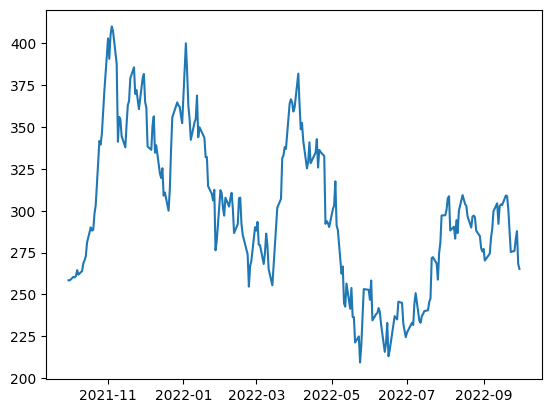

In [10]:
# Historical view of the closing price of stock
plt.plot(
        tsla_df.index,       # x-axis
        tsla_df['Adj Close'] # y-axis
    )

## Data Preprocessing

In [11]:
# Calculation of moving averages for 5 days of stocks
ma = 5
column_name = "MA for %s days" %(str(ma))    
tsla_df[column_name] = tsla_df['Adj Close'].rolling(window=ma).mean()
tsla_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,NaN
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,NaN
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,NaN
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,NaN
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,259.704669
...,...,...,...,...,...,...,...
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,289.891998
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,284.733997
2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,282.135999


In [12]:
# Use lambda function to create a column for color
# red: Open > Close
# blue: Open <= Close

def compare_open_and_close_price(open_price, close_price):
    return 'red' if open_price>close_price else 'blue'

tsla_df['color'] = tsla_df.apply(lambda x: compare_open_and_close_price(x['Open'], x['Close']), axis=1)
tsla_df

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,color
Date,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,NaN,red
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,NaN,red
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,NaN,red
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,NaN,red
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,259.704669,blue
...,...,...,...,...,...,...,...,...
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,289.891998,blue
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,284.733997,red
2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,282.135999,blue


In [13]:
# Change the column name from 'Adj Close' to 'MA for 1 days'
tsla_df=tsla_df.rename(columns = {'Adj Close':'MA for 1 days'})
tsla_df

,Open,High,Low,Close,MA for 1 days,Volume,MA for 5 days,color
Date,,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,NaN,red
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,NaN,red
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,NaN,red
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,NaN,red
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,259.704669,blue
...,...,...,...,...,...,...,...,...
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,289.891998,blue
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,284.733997,red
2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,282.135999,blue


## Visualization
- plt: matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.

In [14]:
# Define the color by map
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}

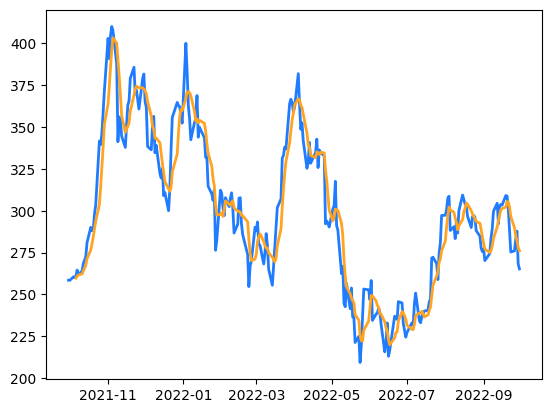

In [15]:
# Show 1MA and 5MA line chart
mov_avg = {
        'MA (1)': {'Range': 1, 'Color': colors['blue']},
        'MA (5)': {'Range': 5, 'Color': colors['orange']}
    }

date = tsla_df.index

for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))    
    plt.plot(
        date, 
        tsla_df[column_name], 
        color=ma_info['Color'], 
        label=ma, 
        linewidth=2
    )

<BarContainer object of 253 artists>

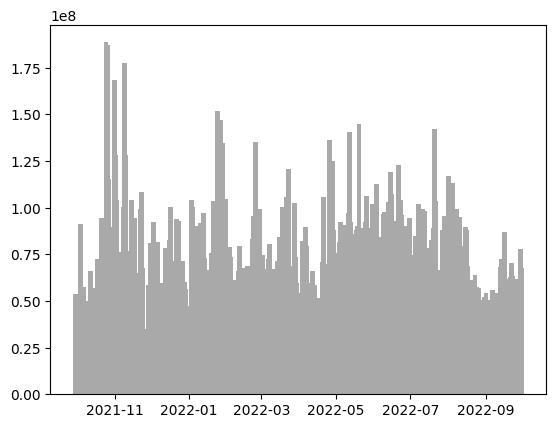

In [16]:
# Volumn bar plot
vol = tsla_df['Volume']

vol_plot = plt.bar(date, vol, width=4, color='darkgrey')
vol_plot

<BarContainer object of 253 artists>

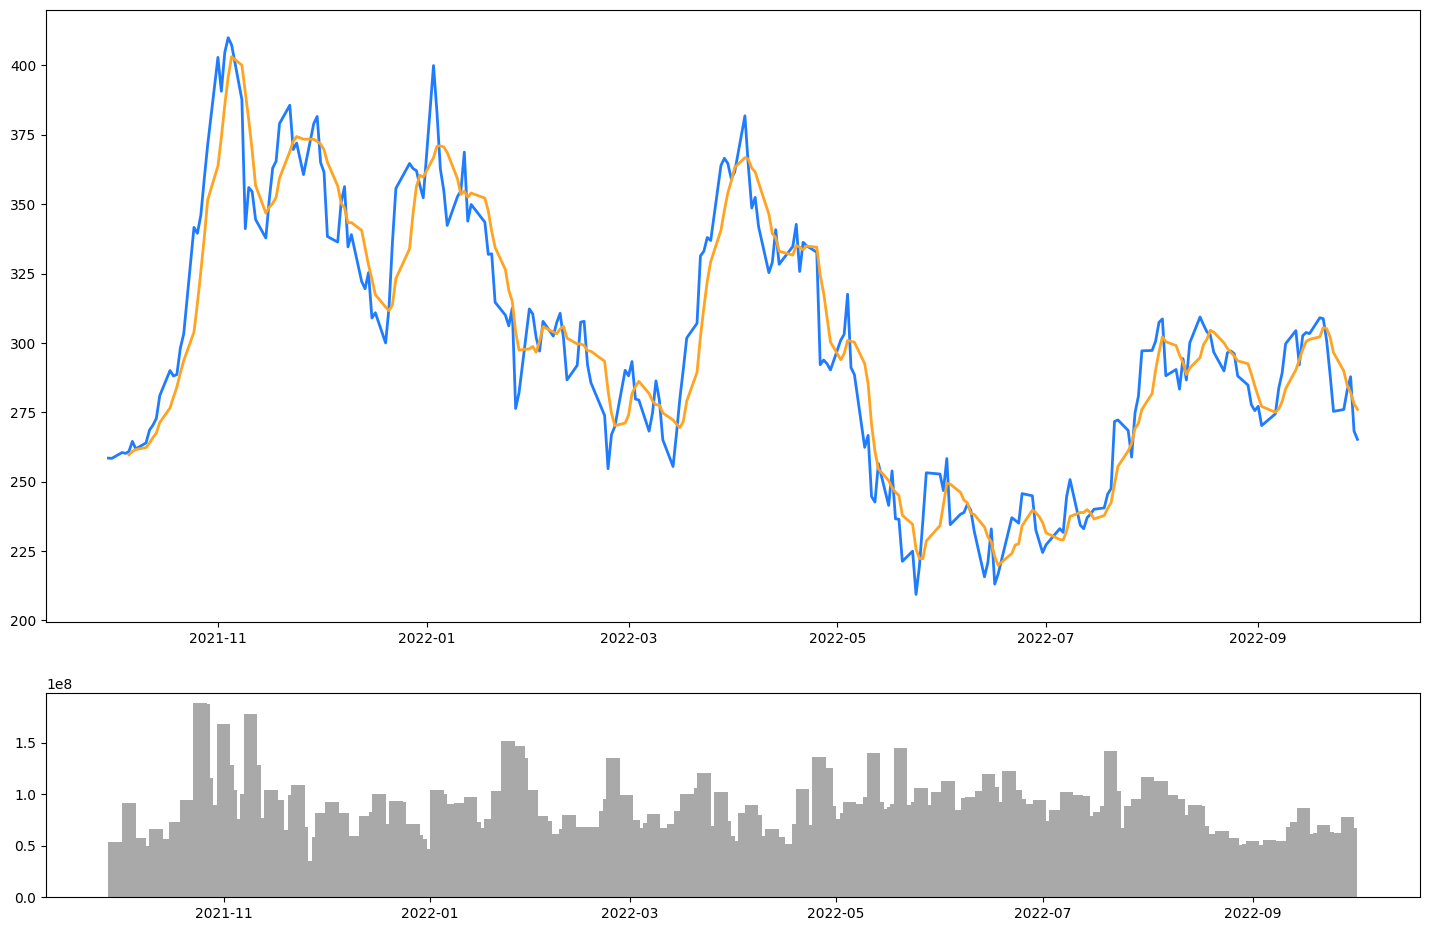

In [17]:
# Combine prices and volumes in one figure

# The setting of figure
plt.rc('figure', figsize=(15, 10))

# Create a figure and a set of subplots.
fig, axes = plt.subplots(
    2, # rows
    1, # columns
    gridspec_kw={'height_ratios': [3, 1]} # Defines the relative heights of the rows
)

# Adjust the padding between and around subplots.
fig.tight_layout(pad=3)

# subplot 1
plot_close_price = axes[0]
for ma, ma_info in mov_avg.items():
    column_name = "MA for %s days" %(str(ma_info['Range']))    
    plot_close_price.plot(
        date, tsla_df[column_name], 
        color=ma_info['Color'], label=ma, linewidth=2
    )

# subplot 2
plot_vol = axes[1]
plot_vol.bar(date, vol, width=4, color='darkgrey')